### display  EEG data channel location

 - 뇌파 데이터는 머리의 두피 부분에 전극을 연결하여 전위를 측정한 것이다
 
 - 따라서 각 전극은 머리의 어느 위치에 있느냐에 따라 서로 다른 위치를 가진다고 볼 수 있다
 
 - 이러한 전극을 위치에 따라 배치하는 방법은 매우 여러가지가 있다
 
 - 이러한 배치 방법을 montage라고 부른다
 
 - 뇌전증(epilepsy)를 측정하는데에 용이한 배치 방법으로는 double banana montage가 있다

In [1]:
# eeg 데이터의 경로를 정의
eeg_data_path = 'data/00002806_s001_t000.edf'

In [14]:
# 사용할 모듈의 함수를 정의
import os
import mne
from mne.io import read_raw_edf

In [3]:
# 데이터를 읽기
raw = read_raw_edf(eeg_data_path, preload=True)

Extracting EDF parameters from data/00002806_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10399  =      0.000 ...    25.997 secs...


In [ ]:
# 심전도 channel 이름을 좀 더 명확하게 바꾸기
raw.rename_channels(mapping={'EEG EKG-REF': 'EKG'})

# EKG channel에 대하여 설정 변경
raw.set_channel_types(mapping={'EKG': 'ecg'})

# events channel에 대하여 설정 변경
raw.set_channel_types(mapping={'STI 014': 'stim'})

In [ ]:
%matplotlib notebook

<IPython.core.display.Javascript object>


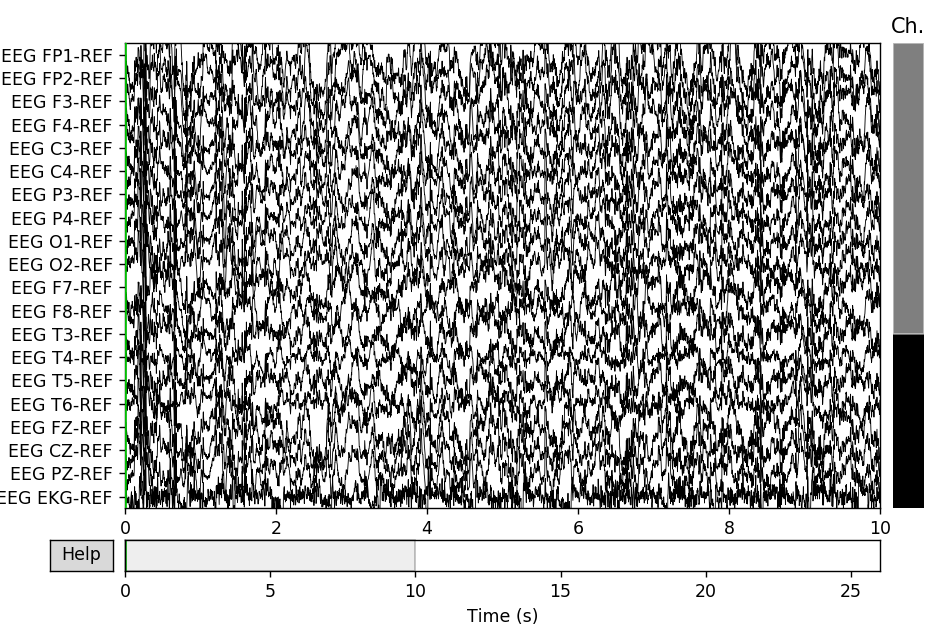

<IPython.core.display.Javascript object>


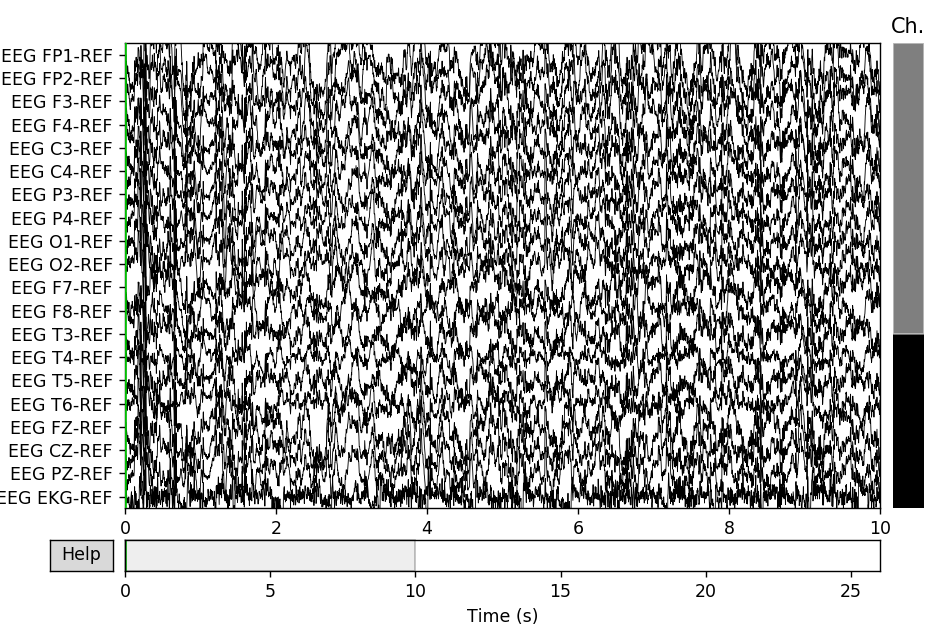

In [4]:
# EEG를 display
raw.plot(scalings = dict(eeg = 80e-6))

In [5]:
raw.ch_names

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG EKG-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'EEG SP1-REF',
 'EEG SP2-REF',
 'EEG LUC-REF',
 'EEG RLC-REF',
 'EEG RESP1-REF',
 'EEG RESP2-REF',
 'EEG 31-REF',
 'STI 014']

 - 여기서 필요없다고 생각되는 channel을 선택하여 삭제한다  
 
 - 여기서는 호흡 및 뇌파 전극과 크게 관련 없는 channel을 삭제한다  
 
 - 삭제할 channel의 이름들은 아래와 같다  
 
 > 

In [ ]:
# channel drop!
raw.drop_channels(['T7', 'CZ', 'CP5', 'CP1', 'CP2'])

In [6]:
raw.info['dig']

In [10]:
raw.info['chs']

[{'cal': 65534.0,
  'logno': 1,
  'scanno': 1,
  'range': 58966.22,
  'unit_mul': 0.0,
  'ch_name': 'EEG FP1-REF',
  'unit': 107,
  'coord_frame': 4,
  'coil_type': 1,
  'kind': 2,
  'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])},
 {'cal': 65534.0,
  'logno': 2,
  'scanno': 2,
  'range': 58966.22,
  'unit_mul': 0.0,
  'ch_name': 'EEG FP2-REF',
  'unit': 107,
  'coord_frame': 4,
  'coil_type': 1,
  'kind': 2,
  'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])},
 {'cal': 65534.0,
  'logno': 3,
  'scanno': 3,
  'range': 58966.22,
  'unit_mul': 0.0,
  'ch_name': 'EEG F3-REF',
  'unit': 107,
  'coord_frame': 4,
  'coil_type': 1,
  'kind': 2,
  'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])},
 {'cal': 65534.0,
  'logno': 4,
  'scanno': 4,
  'range': 58966.22,
  'unit_mul': 0.0,
  'ch_name': 'EEG F4-REF',
  'unit': 107,
  'coord_frame': 4,
  'coil_type': 1,
  'kind': 2,
  'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])},
 {'cal': 6

In [15]:
montage_dir = os.path.join(os.path.dirname(mne.__file__),
                           'channels', 'data', 'montages')
print('\nBUILT-IN MONTAGE FILES')
print('======================')
print(sorted(os.listdir(montage_dir)))


BUILT-IN MONTAGE FILES
['EGI_256.csd', 'GSN-HydroCel-128.sfp', 'GSN-HydroCel-129.sfp', 'GSN-HydroCel-256.sfp', 'GSN-HydroCel-257.sfp', 'GSN-HydroCel-32.sfp', 'GSN-HydroCel-64_1.0.sfp', 'GSN-HydroCel-65_1.0.sfp', 'biosemi128.txt', 'biosemi16.txt', 'biosemi160.txt', 'biosemi256.txt', 'biosemi32.txt', 'biosemi64.txt', 'easycap-M1.txt', 'easycap-M10.txt', 'mgh60.elc', 'mgh70.elc', 'standard_1005.elc', 'standard_1020.elc', 'standard_alphabetic.elc', 'standard_postfixed.elc', 'standard_prefixed.elc', 'standard_primed.elc']


In [34]:
mne.channels.get_builtin_montages() #'montage_dir\\standard_1020.elc'

['EGI_256',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'biosemi128',
 'biosemi16',
 'biosemi160',
 'biosemi256',
 'biosemi32',
 'biosemi64',
 'easycap-M1',
 'easycap-M10',
 'mgh60',
 'mgh70',
 'standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed']

In [56]:
montage = mne.channels.read_montage(montage_dir + '/standard_postfixed.elc')

In [57]:
montage.ch_names

['LPA',
 'RPA',
 'Nz',
 'Fp1',
 'Fpz',
 'Fp2',
 'F7a',
 'F5a',
 'F3a',
 'F1a',
 'Fza',
 'F2a',
 'F4a',
 'F6a',
 'F8a',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'F7p',
 'F5p',
 'F3p',
 'F1p',
 'Fzp',
 'F2p',
 'F4p',
 'F6p',
 'F8p',
 'T1',
 'T3a',
 'C5a',
 'C3a',
 'C1a',
 'Cza',
 'C2a',
 'C4a',
 'C6a',
 'T4a',
 'T2',
 'T3',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T4',
 'T3p',
 'C5p',
 'C3p',
 'C1p',
 'Czp',
 'C2p',
 'C4p',
 'C6p',
 'T4p',
 'T5a',
 'P5a',
 'P3a',
 'P1a',
 'Pza',
 'P2a',
 'P4a',
 'P6a',
 'T6a',
 'Cb1a',
 'T5',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'T6',
 'Cb2a',
 'Cb1',
 'O1a',
 'P5p',
 'P3p',
 'P1p',
 'Pzp',
 'P2p',
 'P4p',
 'P6p',
 'O2a',
 'Cb2',
 'O1',
 'Oz',
 'O2',
 'Cb1p',
 'Iz',
 'Cb2p',
 'M1',
 'M2',
 'A1',
 'A2']

18 duplicate electrode labels found:
F7p/T3a, F5p/C5a, F3p/C3a, F1p/C1a, Fzp/Cza, F2p/C2a, F4p/C4a, F6p/C6a, F8p/T4a, T3p/T5a, C5p/P5a, C3p/P3a, C1p/P1a, Czp/Pza, C2p/P2a, C4p/P4a, C6p/P6a, T4p/T6a
Plotting 85 unique labels.


<IPython.core.display.Javascript object>


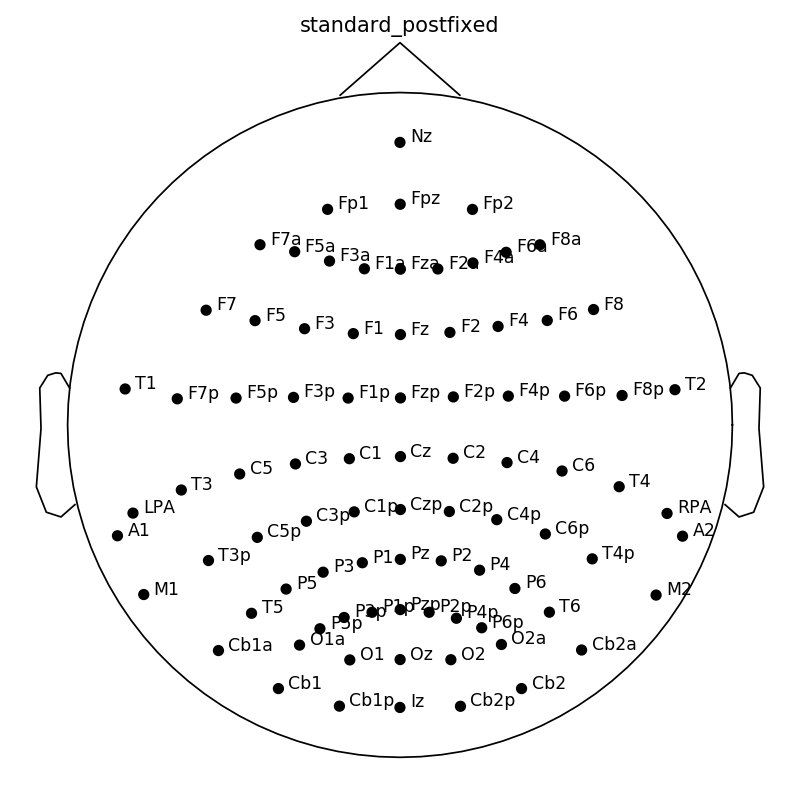

<IPython.core.display.Javascript object>


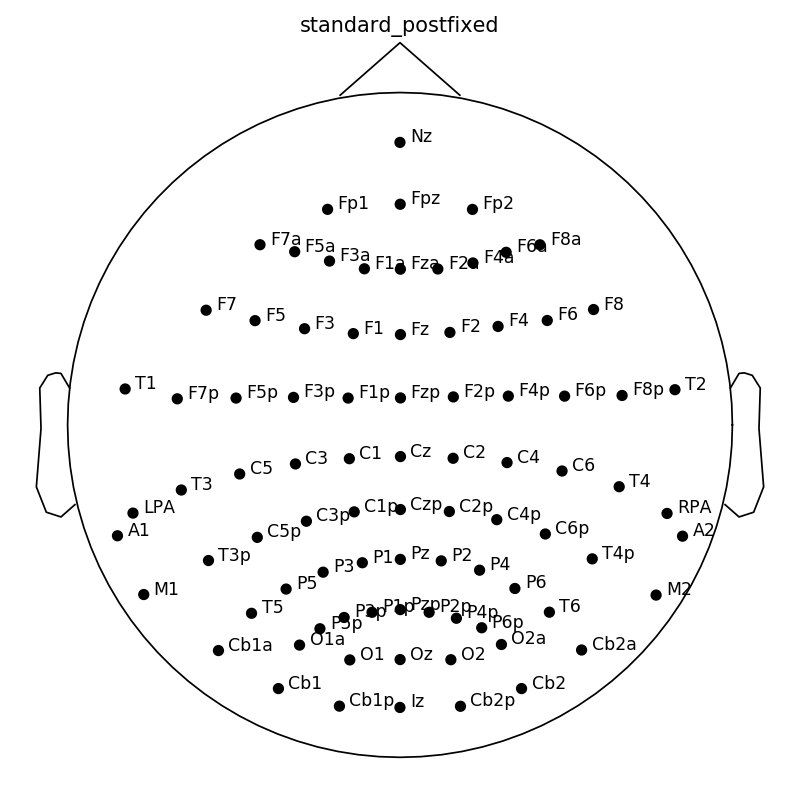

In [58]:
montage.plot()